<a href="https://colab.research.google.com/github/gmfv/PredicciondeCalificacionesC2/blob/main/PrediccionCalculo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
df = pd.read_csv("https://raw.githubusercontent.com/gmfv/Datasets/main/datosfiltrados.csv",index_col=0,skiprows=0)

# **Implementacion de um Modelo de Regresion Logistica**

 **Seleccionamos las columnas a utilizar**

In [ ]:
copy_df=df.copy()
#df = df.drop(df.columns[[0, 1, 2, 3, 5, 7, 12]], axis='columns')
#df.head()
copy_df=copy_df.set_index("id_anony")
copy_df=copy_df[copy_df["Asignatura"] == "CALCULO 2"]
columns_keep=["Cod.Car.Sec","Anho","Semestre", "Aprobado", "Anho.Firma",
              "Primer.Par", "Segundo.Par", "AOT"]
copy_df=copy_df[columns_keep]
copy_df#.head()

,Cod.Car.Sec,Anho,Semestre,Aprobado,Anho.Firma,Primer.Par,Segundo.Par,AOT
id_anony,,,,,,,,
es_1444,ELE-PLS13,2017,1,N,0,7,0,0
es_4238,CGF-PLS13,2017,1,N,0,5,0,0
es_4245,ELE-PLS13,2017,1,S,2016,0,0,0
es_4967,CIV-PLS13,2017,1,N,0,0,0,0
es_414,CGF-PLS13,2017,1,S,2017,21,10,0
...,...,...,...,...,...,...,...,...
es_9590,IND-PLS13,2019,2,N,0,5,4,2
es_9697,CIV-PLS13,2019,2,N,0,5,0,5
es_9437,CIV-PLS13,2019,2,N,0,0,0,0


**Reemplazamos las salidas (Si aprobo o no) por 1 o 0, las carreras por códigos**

In [ ]:
copy_df['Aprobado']=copy_df['Aprobado'].replace(['N', 'S'],['0', '1'])
carreras=pd.Series(['0', '1', '2', '3', '4', '5', '6', '7', '8','9'],index=[copy_df['Cod.Car.Sec'].unique()])
#copy_df['Cod.Car.Sec']=copy_df['Cod.Car.Sec'].replace(copy_df['Cod.Car.Sec'].unique(),['0', '1', '2', '3', '4', '5', '6', '7', '8','9'])
copy_df['Cod.Car.Sec']=copy_df['Cod.Car.Sec'].replace(carreras)
#copy_df = copy_df.fillna(0)
copy_df#.head()
carreras

ELE-PLS13     0
CGF-PLS13     1
CIV-PLS13     2
MCT-PLS13     3
ECA-PLS13     4
IND-PLS13     5
MEC-PLS13     6
ELE-PLS09     7
IND-PLS09     8
CIV-PLS09     9
dtype: object

**Descartamos columnas para facilitar analisis inicial**

---
Solo tenemos en cuenta el rendimiento de primer, segundo parcial y taller


In [ ]:
X = np.array(copy_df.drop(['Cod.Car.Sec', 'Anho','Semestre','Anho.Firma','Aprobado'], axis=1))
y = np.array(copy_df['Aprobado'])

In [ ]:
model = linear_model.LogisticRegression()
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = model.predict(X)

Precision media de:

In [ ]:
model.score(X,y)

0.8090737240075614

## **VALIDACION**

**Dividimos nuestros datos en una seccion para entrenar y otra para validar**

In [ ]:
validation_size = 0.20
seed = 85
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

**Entrenamos a nuestro modelo con el 80% de los datos. Obteniendo una media de exactitud y desviación estandar que se imprimen en pantalla**

In [ ]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.799850 (0.018617)


**Precision del Modelo**

In [ ]:
predictions = model.predict(X_validation)
print('La precision del Modelo es: {}%'.format(accuracy_score(Y_validation, predictions)*100))
accuracy=[]
accuracy.append(accuracy_score(Y_validation, predictions))

La precision del Modelo es: 84.59119496855347%


Tener en cuenta que la cantidad de datos reservados para la validacion era pequeña en comparacion

## **Matrices de confusion**

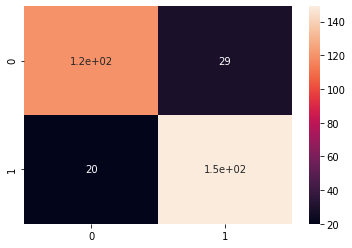

In [ ]:
 import seaborn as sns
 matrizglobal= confusion_matrix(Y_validation, predictions)
 sns.heatmap(matrizglobal, annot=True)

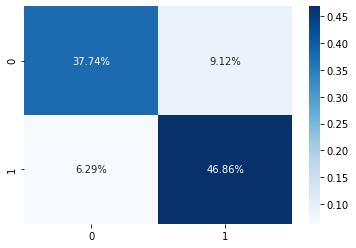

In [ ]:
sns.heatmap(matrizglobal/np.sum(matrizglobal), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
matrizglobal = matrizglobal.flatten() 
mc = np.asarray(matrizglobal)

 **Prueba** 

In [ ]:
X_new = pd.DataFrame({'Primer.Par': [15], 'Segundo.Par': [24], 'AOT': [4]})
model.predict(X_new)[0]

'1'

## **Comparación con un modelo de precisión por carrera**

In [ ]:
for i in range(7):
  datfriend = copy_df[copy_df['Cod.Car.Sec'] == str(i)]

  if (i == 0):
    datfriend = pd.concat([datfriend, copy_df[copy_df['Cod.Car.Sec'] == str(7)]], axis=0)
  elif (i == 2):
    datfriend = pd.concat([datfriend, copy_df[copy_df['Cod.Car.Sec'] == str(9)]], axis=0)
  elif (i == 5):
    datfriend = pd.concat([datfriend, copy_df[copy_df['Cod.Car.Sec'] == str(8)]], axis=0)

  X = np.array(datfriend.drop(['Cod.Car.Sec', 'Anho','Semestre','Anho.Firma','Aprobado'], axis=1))
  y = np.array(datfriend['Aprobado'])
  model = linear_model.LogisticRegression()
  model.fit(X,y)
  seed=85
  X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=0.5, random_state=seed)
  kfold = model_selection.KFold(n_splits=10,shuffle=True ,random_state=seed)
  cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
  predictions = model.predict(X_validation)
  accuracy.append(accuracy_score(Y_validation, predictions))
  matrizdeconfusion= confusion_matrix(Y_validation, predictions)
  matrizdeconfusion = matrizdeconfusion.flatten()   #Convertimos la matriz de confusion a 1 dimension 
  mc=np.vstack((mc,matrizdeconfusion)) #Colocamos al final de la matriz que recolecta los TT, FT, TF, FF de las carreras
#accuracy = np.array(accuracy) #Convertimos la lista a un arreglos numpy, esto era porque queria intentar concater la matriz mc y el de accuracy, pero no pude todavia gg

**Creamos un Dataframe con los datos de las matrices de confusion por carreras y global, y le agregamos las precisiones**

In [ ]:
datos=pd.DataFrame(mc, index=['GLOBAL','ELE', 'CGF', 'CIV', 'MCT', 'ECA', 'IND', 'MEC'], columns=['TN', 'FP', 'FN', 'TP'])
datos['Accuracy']=accuracy
datos

,TN,FP,FN,TP,Accuracy
GLOBAL,120,29,20,149,0.845912
ELE,76,17,11,89,0.854922
CGF,23,0,9,1,0.727273
CIV,130,25,30,170,0.845070
MCT,29,8,7,45,0.831461
ECA,13,5,1,8,0.777778
IND,23,7,9,27,0.757576
MEC,14,4,4,11,0.757576


**Comparacion de los Modelos Global y por carreras en cuanto a falsos positivos y falsos negativos**

In [ ]:
carr=datos.drop(['GLOBAL'],axis=0)[['FP','FN']].apply(lambda x: sum(x))
print('La cantidad de Falsos Positivos del modelo por carreras es {} mientras que de el modelo Global es {}'.format(carr[0],int(datos.loc['GLOBAL']['FP'])))
print('La cantidad de Falsos Negativos del modelo por carreras es {} mientras que de el modelo Global es {}'.format(carr[1],int(datos.loc['GLOBAL']['FN'])))

La cantidad de Falsos Positivos del modelo por carreras es 66 mientras que de el modelo Global es 29
La cantidad de Falsos Negativos del modelo por carreras es 71 mientras que de el modelo Global es 20


De esta forma Concluimos que no es valido representar el modelo separado por carreras, o que es menos efectivo que un modelo Global

# **Arreglamos la columna de notas finales, separando en primer, segundo y tercer final, se agrega una columna más que sería la nota del último final que rindió el alumno**

In [ ]:
global primerfinal
primerfinal=[]
global primerfinal
segundofinal=[]
global primerfinal
tercerfinal=[]
def separar(nota):    
  if nota is '':
    primerfinal.append('')
    segundofinal.append('')
    tercerfinal.append('')
  else:
    if nota.startswith('1F'):
      valor=nota.split(',')[0].split('-')[-1]
      primerfinal.append(valor)
      if (len(nota.split(','))==2) and (nota.split(',')[-1].startswith('2F')):
        valor=nota.split(',')[-1].split('-')[-1]
        segundofinal.append(valor)
        tercerfinal.append('')
      elif (len(nota.split(','))==2) and (nota.split(',')[-1].startswith('3F')):
        valor=nota.split(',')[-1].split('-')[-1]
        tercerfinal.append(valor)
        segundofinal.append('')
      elif len(nota.split(','))==3:
        valor=nota.split(',')[1].split('-')[-1]
        segundofinal.append(valor)
        valor=nota.split(',')[2].split('-')[-1]
        tercerfinal.append(valor)
      else:
        segundofinal.append('')
        tercerfinal.append('')
    elif nota.startswith('2F'):
      valor=nota.split(',')[0].split('-')[-1]
      segundofinal.append(valor)
      primerfinal.append('')
      if len(nota.split(','))==2:
        valor=nota.split(',')[-1].split('-')[-1]
        tercerfinal.append(valor)
      else:
        tercerfinal.append('')
    elif nota.startswith('3F'):
      valor=nota.split(',')[0].split('-')[-1]
      tercerfinal.append(valor)
      primerfinal.append('')
      segundofinal.append('')
  return nota

copy_df['Primer.Rec'],copy_df['Segundo.Rec'],copy_df['Nota.Final'] = df[df["Asignatura"] == "CALCULO 2"]['Primer.Rec'].values,df[df["Asignatura"] == "CALCULO 2"]['Segundo.Rec'].values,df[df["Asignatura"] == "CALCULO 2"]['Nota.Final'].values

copy_df=copy_df.fillna('')

copy_df['Nota.Final'].apply(lambda x: separar(x))
copy_df['Primer.Final'],copy_df['Segundo.Final'],copy_df['Tercer.Final']=primerfinal,segundofinal,tercerfinal
copy_df['Final.Val']=copy_df['Nota.Final'].apply(lambda x: x.split(',')[-1].split('-')[-1])

copy_df


,Cod.Car.Sec,Anho,Semestre,Aprobado,Anho.Firma,Primer.Par,Segundo.Par,AOT,Primer.Rec,Segundo.Rec,Nota.Final,Primer.Final,Segundo.Final,Tercer.Final,Final.Val
id_anony,,,,,,,,,,,,,,,
es_1444,0,2017,1,0,0,7,0,0,0,0,,,,,
es_4238,1,2017,1,0,0,5,0,0,0,0,,,,,
es_4245,0,2017,1,1,2016,0,0,0,0,0,"1F-1,2F-2",1,2,,2
es_4967,2,2017,1,0,0,0,0,0,0,0,,,,,
es_414,1,2017,1,1,2017,21,10,0,0,0,3F-C-3,,,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
es_9590,5,2019,2,0,0,5,4,2,0,0,,,,,
es_9697,2,2019,2,0,0,5,0,5,0,0,,,,,
es_9437,2,2019,2,0,0,0,0,0,0,0,,,,,


In [ ]:
#copy_df[copy_df[].startswith(carreras.index[i][0].split('-')[0])]      asi podriamos hacer en una linea el df de cada carrera, 2009 y 2013
df=df.set_index('id_anony')
len(np.unique(df.index.values)) #id_anony que estan en Calculo 1 y Calculo 2

4574

# **Modelo que incluye los datos de Primer y Segundo Recuperatorio, los cuales pudieran o no ser representativos**

La Precision de este modelo es: 86.47798742138365%


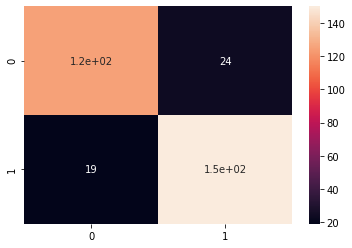

In [ ]:
import seaborn as sns
X = np.array(copy_df[['Primer.Par','Segundo.Par','AOT','Primer.Rec','Segundo.Rec']])
y = np.array(copy_df['Aprobado'])
model = linear_model.LogisticRegression()
model.fit(X,y)
predictions = model.predict(X)
validation_size = 0.20
#seed=56, 85
seed = 85
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)
predictions = model.predict(X_validation)
print('La Precision de este modelo es: {}%'.format(accuracy_score(Y_validation, predictions)*100))
matrizglobal= confusion_matrix(Y_validation, predictions)
sns.heatmap(matrizglobal, annot=True)

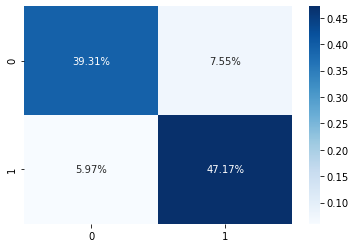

In [ ]:
sns.heatmap(matrizglobal/np.sum(matrizglobal), annot=True, 
            fmt='.2%', cmap='Blues')

**Prueba**

In [ ]:
X_new = pd.DataFrame({'Primer.Par': [24], 'Segundo.Par': [36], 'AOT': [10], 'Primer.Recu': [0], 'Segundo.Recu': [0]})
model.predict(X_new)[0]

'1'

# **Implementacion de un Modelo de Red Neuronal del Primer Modelo**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split
#copy_df=copy_df[copy_df['Nota.Final'] != '']
#copy_df['Anho.Firma']=copy_df['Anho.Firma'].apply(lambda x: 1 if x>0 else 0)
X = copy_df[['Primer.Par','Segundo.Par','AOT']].values#,'Anho.Firma']].values
y = copy_df['Aprobado'].apply(lambda x: int(x)).values
seed=85
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=seed)
model = Sequential()
model.add(Dense(15, activation='linear' , input_shape=(3,)))
model.add(Dense(10, activation='linear'))
model.add(Dense(10, activation='linear'))
model.add(Dense(15, activation='linear'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss="mse",optimizer="adam",metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs=500, batch_size=381, verbose=0, validation_split=0.2)
predictions = model.predict(X_test).reshape(-1).round()
#predict_label = predictions.reshape(-1).round()#.agg(lambda x: int(x))

test_loss, test_acc = model.evaluate(X_test, y_test)
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix) 

10/10 [==============================] - 0s 2ms/step - loss: 0.1180 - accuracy: 0.8648
[[127  22]
 [ 21 148]]


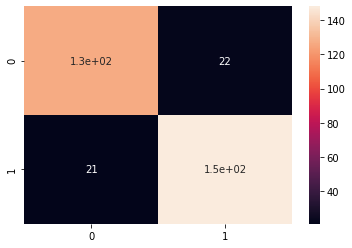

In [ ]:
sns.heatmap(cf_matrix, annot=True)

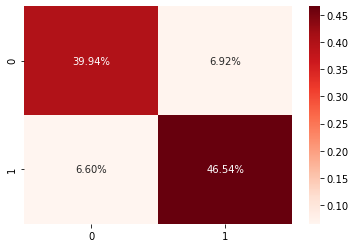

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Reds')

In [ ]:
scores = model.evaluate(X, y)
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print('La Precision de este modelo es de: {}'.format(test_acc*100))

50/50 [==============================] - 0s 1ms/step - loss: 0.1393 - accuracy: 0.8192
La Precision de este modelo es de: 86.47798895835876


In [ ]:
model.summary()

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_304 (Dense)            (None, 15)                60        
_________________________________________________________________
dense_305 (Dense)            (None, 10)                160       
_________________________________________________________________
dense_306 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_307 (Dense)            (None, 15)                165       
_________________________________________________________________
dense_308 (Dense)            (None, 1)                 16        
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_new = pd.DataFrame({'Primer.Par': [24], 'Segundo.Par': [36], 'AOT': [10],})
model.predict(X_new)[0][0]

0.98713285

In [ ]:
copy_df

,Cod.Car.Sec,Anho,Semestre,Aprobado,Anho.Firma,Primer.Par,Segundo.Par,AOT,Primer.Rec,Segundo.Rec,Nota.Final,Primer.Final,Segundo.Final,Tercer.Final,Final.Val
id_anony,,,,,,,,,,,,,,,
es_1444,0,2017,1,0,0,7,0,0,0,0,,,,,
es_4238,1,2017,1,0,0,5,0,0,0,0,,,,,
es_4245,0,2017,1,1,1,0,0,0,0,0,"1F-1,2F-2",1,2,,2
es_4967,2,2017,1,0,0,0,0,0,0,0,,,,,
es_414,1,2017,1,1,1,21,10,0,0,0,3F-C-3,,,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
es_9590,5,2019,2,0,0,5,4,2,0,0,,,,,
es_9697,2,2019,2,0,0,5,0,5,0,0,,,,,
es_9437,2,2019,2,0,0,0,0,0,0,0,,,,,


##**Implementacion en Red Neuronal del Segundo Modelo**

In [ ]:
X = copy_df[['Primer.Par','Segundo.Par','AOT','Primer.Rec','Segundo.Rec']].values
y = copy_df['Aprobado'].apply(lambda x: int(x)).values
seed=85
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=seed)
model = Sequential()
model.add(Dense(15, activation='linear' , input_shape=(5,)))
model.add(Dense(10, activation='linear'))
model.add(Dense(10, activation='linear'))
model.add(Dense(10, activation='linear'))
model.add(Dense(15, activation='linear'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss="mse",optimizer="adam",metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs=500, batch_size=381, verbose=0, validation_split=0.2)
predictions = model.predict(X_test).reshape(-1).round()
#predict_label = predictions.reshape(-1).round()#.agg(lambda x: int(x))

test_loss, test_acc = model.evaluate(X_test, y_test)
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix) 

10/10 [==============================] - 0s 2ms/step - loss: 0.1125 - accuracy: 0.8711
[[127  22]
 [ 19 150]]


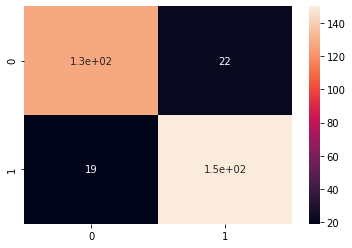

In [ ]:
sns.heatmap(cf_matrix, annot=True)

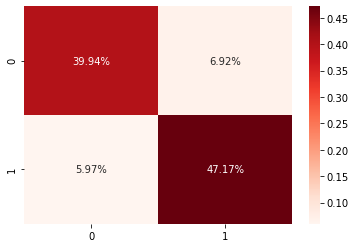

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Reds')

In [ ]:
scores = model.evaluate(X, y)
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print('La Precision de este modelo es de: {}'.format(test_acc*100))

50/50 [==============================] - 0s 1ms/step - loss: 0.1339 - accuracy: 0.8311
La Precision de este modelo es de: 87.10691928863525


In [ ]:
model.summary()

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_292 (Dense)            (None, 15)                90        
_________________________________________________________________
dense_293 (Dense)            (None, 10)                160       
_________________________________________________________________
dense_294 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_295 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_296 (Dense)            (None, 15)                165       
_________________________________________________________________
dense_297 (Dense)            (None, 1)                 16        
Total params: 651
Trainable params: 651
Non-trainable params: 0
_______________________________________________________

In [ ]:
X_new = pd.DataFrame({'Primer.Par': [24], 'Segundo.Par': [36], 'AOT': [10], 'Primer.Recu': [0], 'Segundo.Recu': [0]})
model.predict(X_new)[0][0]

0.9768237

# **Modelo que incluye Firmas anteriores**

In [ ]:
copy_df['Firma']=copy_df['Anho.Firma'].apply(lambda x: 1 if x>0 else 0)
X = copy_df[['Primer.Par','Segundo.Par','AOT','Firma']].values
y = copy_df['Aprobado'].apply(lambda x: int(x)).values
seed=85
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=seed)
model = Sequential()
model.add(Dense(15, activation='linear' , input_shape=(4,)))
model.add(Dense(10, activation='linear'))
model.add(Dense(10, activation='linear'))
model.add(Dense(15, activation='linear'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss="mse",optimizer="adam",metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs=500, batch_size=381, verbose=0, validation_split=0.2)
predictions = model.predict(X_test).reshape(-1).round()
#predict_label = predictions.reshape(-1).round()#.agg(lambda x: int(x))

test_loss, test_acc = model.evaluate(X_test, y_test)
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix) 

In [ ]:
sns.heatmap(cf_matrix, annot=True)

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Reds')

In [ ]:
scores = model.evaluate(X, y)
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print('La Precision de este modelo es de: {}'.format(test_acc*100))

In [ ]:
model.summary()

In [ ]:
X_new = pd.DataFrame({'Primer.Par': [24], 'Segundo.Par': [36], 'AOT': [10], 'Firma': [0]})
model.predict(X_new)[0][0]